In [64]:
n_all = spark.read.parquet('s3://adtech-ml-perf-ads-us-east-1-prod-v1/data/live_ads_inventory_forecasting/user_num/').toPandas()
n_sub = spark.read.parquet('s3://adtech-ml-perf-ads-us-east-1-prod-v1/data/live_ads_inventory_forecasting/sub_num/').toPandas()

In [8]:
import pandas as pd
pd.to_datetime(n_all.cd).describe(datetime_is_numeric=True)

count                             1370
mean     2021-03-22 11:59:59.999999744
min                2019-05-08 00:00:00
25%                2020-04-14 06:00:00
50%                2021-03-22 12:00:00
75%                2022-02-27 18:00:00
max                2023-02-05 00:00:00
Name: cd, dtype: object

In [11]:
pd.to_datetime(n_sub.cd).describe(datetime_is_numeric=True)

count                             1115
mean     2020-11-27 11:14:09.147982080
min                2019-05-07 00:00:00
25%                2020-02-09 12:00:00
50%                2020-11-14 00:00:00
75%                2021-08-19 12:00:00
max                2023-02-01 00:00:00
Name: cd, dtype: object

In [13]:
a = pd.date_range('2019-05-08', '2023-02-05')
b = pd.to_datetime(n_all.cd)

In [14]:
set(a) - set(b)

set()

In [16]:
pd.to_datetime(n_sub.cd).describe(datetime_is_numeric=True)

count                             1115
mean     2020-11-27 11:14:09.147982080
min                2019-05-07 00:00:00
25%                2020-02-09 12:00:00
50%                2020-11-14 00:00:00
75%                2021-08-19 12:00:00
max                2023-02-01 00:00:00
Name: cd, dtype: object

In [22]:
n_all.to_csv('n_all.csv', index=False)
n_sub.to_csv('n_sub.csv', index=False)

In [1]:
import pandas as pd
n_all = pd.read_csv('n_all.csv')
n_sub = pd.read_csv('n_sub.csv')

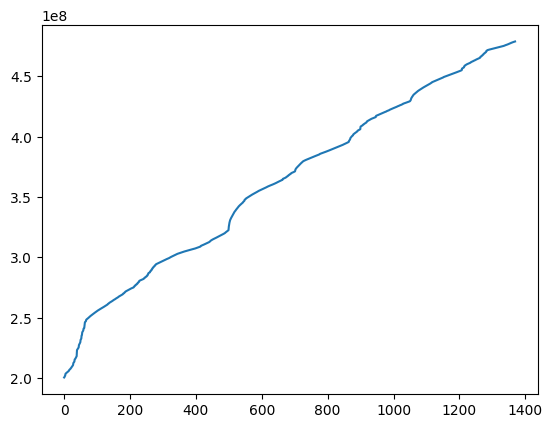

In [9]:
n_all.sort_values('cd', ignore_index=True).user_num.plot();

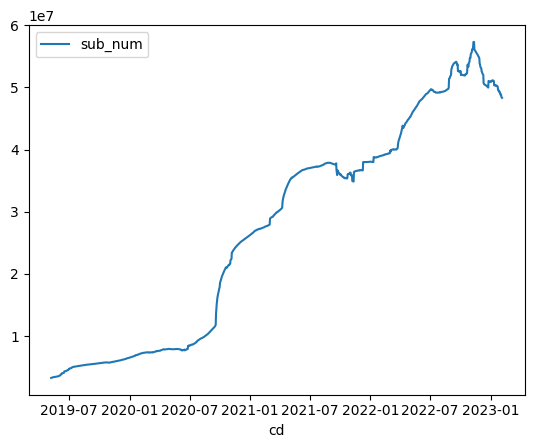

In [65]:
n_sub.sort_values('cd', ignore_index=True).plot(x='cd', y='sub_num');

In [14]:
live_ads_inventory_forecasting_root_path = "s3://adtech-ml-perf-ads-us-east-1-prod-v1/data/live_ads_inventory_forecasting"

In [18]:
!aws s3 ls s3://adtech-ml-perf-ads-us-east-1-prod-v1/data/live_ads_inventory_forecasting/sub_table_valid/ --human-readable --summarize | tail -2 # 86 GB

Total Objects: 1802
   Total Size: 86.0 GiB


In [19]:
!aws s3 ls s3://adtech-ml-perf-ads-us-east-1-prod-v1/data/live_ads_inventory_forecasting/hid_pid_mapping/ --human-readable --summarize | tail -2

Total Objects: 257
   Total Size: 203.2 GiB


In [30]:
'2022-01-15' in n_sub.cd.tolist(), '2022-01-16' in n_sub.cd.tolist()

(True, False)

In [43]:
def check_s3_path_exist(s3_path: str) -> bool:
    return os.system(f"aws s3 ls {s3_path}") == 0

In [33]:
root = 's3://adtech-ml-perf-ads-us-east-1-prod-v1/data/live_ads_inventory_forecasting/'
sub_df = spark.read.parquet(root+'sub_table_valid/')

2022-01-16 00:00:00


In [47]:
sub_df

sub_start_time,sub_end_time,hid
2022-10-23,2023-01-23,dc93878ff4824f1db...
2022-10-23,2023-01-23,80d2ef9911574ea19...
2022-10-23,2023-01-23,37ac8599096c48ecb...
2022-10-23,2023-01-23,acn|singhadityach...
2022-10-23,2023-01-23,14b8e426386e4fc48...
2022-10-23,2023-10-23,5450e0ccf32c4441b...
2022-10-23,2023-10-23,7472e42a0dc54a1f8...
2022-10-23,2023-01-23,acn|nileshsawant5...
2022-10-23,2023-10-23,acn|saiwaldinesh@...
2022-10-23,2023-01-23,06cc797fce264d989...


In [49]:
user_meta_df = spark.read.parquet(root+'hid_pid_mapping/')
user_meta_df

dw_p_id,hid
c34fd4ad9b11c7f1e...,4ca9470b07ec40b19...
6cb27ed6737661df4...,4ca9482fd40e461a9...
85487f62d69c59c8c...,4ca948ed71924ec1b...
afeb2f5a896d8a735...,4ca94bd1f05e4c5ab...
6e7254dca20a82892...,4ca94cab6cff46d98...
0a51f995924e39b46...,4ca951c1f0504396b...
9e0a6c4b96d1ac051...,4ca9542c10114c159...
439324ca157c4d267...,4ca95466eaa143c5a...
799d948a059ab0999...,4ca9564d5c854d75b...
e092e45557d904e07...,4ca9582cb9fb4bcaa...


In [54]:
# Data analysis on user meta mapping
import pyspark.sql.functions as F
df = user_meta_df.groupby('hid').agg(F.count('dw_p_id').alias('cnt')).groupby('cnt').count().toPandas()

In [55]:
df

,cnt,count
0,1,2300419337
1,2,6513
2,0,570


In [56]:
sub_df.join(user_meta_df, 'hid').write.parquet(root+'sub_table_valid_dw_p_id/')

In [57]:
sub_df2 = spark.read.parquet(root+'sub_table_valid_dw_p_id/')

In [58]:
sub_df2

hid,sub_start_time,sub_end_time,dw_p_id
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...
00001155448045bfb...,2022-08-28,2022-11-28,9167ded821330a55c...


In [59]:
def calculate_sub_num_on_target_date(sub_df, target_date):
    return sub_df \
        .where(f'sub_start_time <= "{target_date}" and sub_end_time >= "{target_date}"') \
        .select('dw_p_id') \
        .distinct() \
        .count()

In [ ]:
for d in pd.date_range('2022-01-16', '2023-02-05'):
    cd = str(d.date())
    if check_s3_path_exist(f'{root}sub_num/cd={cd}/_SUCCESS'):
        print(cd, 'skip')
    else:
        print('beg', pd.datetime.now())
        sub_num = calculate_sub_num_on_target_date(sub_df2, cd)
        print(cd, sub_num)
        df = spark.createDataFrame([(sub_num, )], ["sub_num"])
        df.repartition(1).write.mode('overwrite').parquet(f'{root}sub_num/cd={d.date()}')
        print('end', pd.datetime.now())

In [ ]:
beg = '2022-10-16'
end = '2023-02-05'
from pyspark.sql.types import StringType, ArrayType()

@F.udf(returnType=ArrayType(StringType()))
def drange(beg2, end2):
    beg2 = max(beg2, beg)
    end2 = min(end2, end)
    return pd.date_range(beg2, end2).map(lambda x:str(x.date())).tolsit()

cnt_df = sub_df2.where(f'sub_start_time <= "{beg}" and sub_end_time >= "{end}"').select('dw_p_id', F.explode(drange('sub_start_time', 'sub_end_time')).alias('cd')).groupby('cd', 'dw_p_id').count()
cnt_df.write.parquet(root+'sub_num_unified')

In [70]:
df = n_sub.copy()
df.columns = ['y', 'ds']
df

,y,ds
0,24625690,2020-11-23
1,5421137,2019-08-26
2,37245973,2021-07-26
3,37223349,2021-07-23
4,49636237,2022-08-22
...,...,...
1366,35476732,2021-10-15
1367,9667898,2020-08-06
1368,53394403,2022-10-26
1369,6992665,2020-01-24


In [ ]:
from glob import glob
import pandas as pd

def normalize(s):
    return ''.join(i for i in s if i.isalpha())

lst = []

for f in glob('valid_dates/*.json'):
    tour = f.split('/')[1].split('.')[0]
    days = pd.read_json(f, typ='series')
    lst.append(pd.DataFrame({
        'holiday': normalize(tour),
        'ds': days,
        'lower_window': 0,
        'upper_window': 0,
    }))

holidays = pd.concat(lst)
holidays

In [73]:
from prophet import Prophet
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='IN')
model=m.fit(df)

/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
12:26:31 - cmdstanpy - INFO - Chain [1] start processing
12:26:33 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
m.train_holiday_names

In [74]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1731,2024-02-01
1732,2024-02-02
1733,2024-02-03
1734,2024-02-04
1735,2024-02-05


/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/hadoop/.local/lib/python3.7/site-packages/prophet/hdays.py:209: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


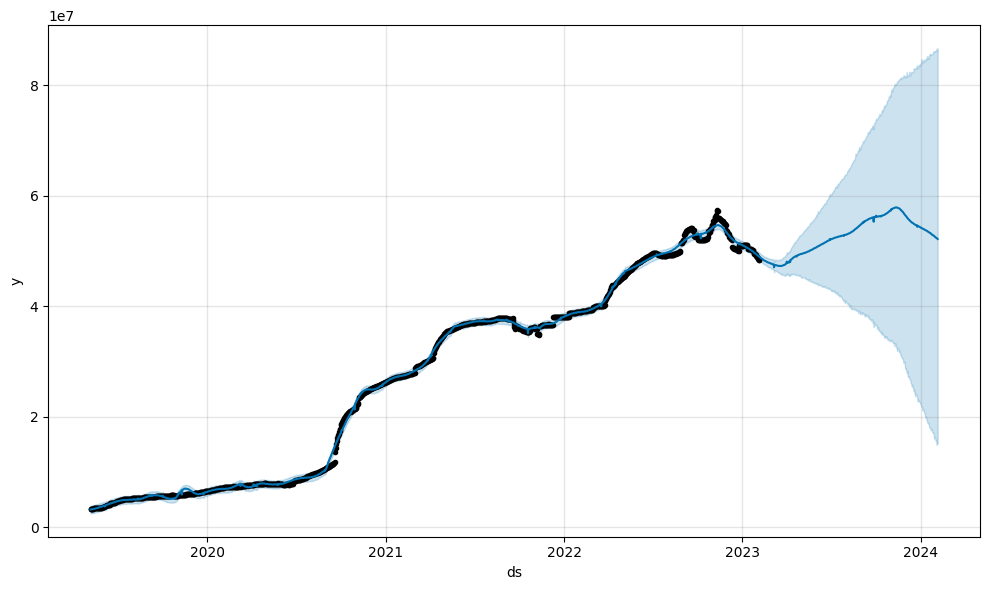

In [76]:
forecast = m.predict(future)
m.plot(forecast);